In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("../raw_data/Morocco_CCT_Education_Baseline_Household.csv",low_memory=False)

# Features Exploration

In [6]:
data.head()

,hhid,schoolunitid,schoolid,type_unit,groupid,benef,id7,id8,id9_2,id10_2,...,year,round,endline,studycode,unitobs,countrycode,ruralcode,gendercode,agecode,surveycode
0,A208004,A208,A208,Secteur Scolaire Centre,2,Mother,Essaouira,Marrakech - Tensift - Al Haouz,NaN,NaN,...,2008,0,0,183,2,151,1,1.0,35.0,NaN
1,A426002,A426,A426,Secteur Scolaire Centre,4,Mother,Essaouira,Marrakech - Tensift - Al Haouz,NaN,076,...,2008,0,0,183,2,151,1,1.0,33.0,NaN
2,A268006,A268,A446,Satellite,1,Mother,Chichaoua,Marrakech - Tensift - Al Haouz,NaN,NaN,...,2008,0,0,183,2,151,1,1.0,31.0,NaN
3,A419004,A419,A419,Secteur Scolaire Centre,2,Mother,Taroudant,Sous - Massa - Draa,NaN,NaN,...,2008,0,0,183,2,151,1,1.0,62.0,NaN
4,A536006,A536,A212,Satellite,1,Mother,Essaouira,Marrakech - Tensift - Al Haouz,1.0,NaN,...,2008,0,0,183,2,151,1,1.0,36.0,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Columns: 3615 entries, hhid to surveycode
dtypes: float64(3471), int64(75), object(69)
memory usage: 133.3+ MB


In [8]:
y = data[["hhid","d8_1"]]
y = y.rename(columns={"hhid":"hhid",
    "d8_1":"Age abandoned school"})
y

,hhid,Age abandoned school
0,A208004,NaN
1,A426002,NaN
2,A268006,NaN
3,A419004,NaN
4,A536006,NaN
...,...,...
4827,A618007,NaN
4828,A571001,NaN
4829,A359007,8.0
4830,A578003,6.0


In [9]:
droped_out_children = y.count()
droped_out_children

hhid                    4832
Age abandoned school    1253
dtype: int64

<AxesSubplot:ylabel='Count'>

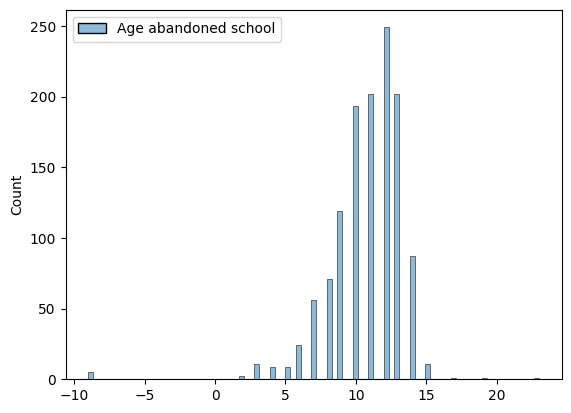

In [10]:
sns.histplot(y)

## Parents

In [11]:
parents = data[["hhid","gendercode","a7_1","a8_1","a10_1","a11_1","a13_1","a18_1"]]
parents.head()

,hhid,gendercode,a7_1,a8_1,a10_1,a11_1,a13_1,a18_1
0,A208004,1.0,1.0,2.0,1.0,2.0,35.0,1.0
1,A426002,1.0,1.0,2.0,2.0,NaN,33.0,1.0
2,A268006,1.0,1.0,1.0,1.0,1.0,31.0,1.0
3,A419004,1.0,2.0,NaN,2.0,NaN,62.0,1.0
4,A536006,1.0,2.0,NaN,1.0,2.0,36.0,1.0


In [12]:
parents = parents.rename(columns={
    "gendercode":"Gender",
    "a7_1": "Mother still living",
    "a8_1": "Mother lives in hh",
    "a10_1": "Father still living",
    "a11_1": "Father lives in hh",
    "a13_1": "Age, in years",
    "a18_1": "Marital Status"
})

In [13]:
parents.head()

,hhid,Gender,Mother still living,Mother lives in hh,Father still living,Father lives in hh,"Age, in years",Marital Status
0,A208004,1.0,1.0,2.0,1.0,2.0,35.0,1.0
1,A426002,1.0,1.0,2.0,2.0,NaN,33.0,1.0
2,A268006,1.0,1.0,1.0,1.0,1.0,31.0,1.0
3,A419004,1.0,2.0,NaN,2.0,NaN,62.0,1.0
4,A536006,1.0,2.0,NaN,1.0,2.0,36.0,1.0


## Parents Education

In [14]:
parents_education = data[["a14_1_1","a14_1_2","a14_1_3","a14_1_4","a15_1_1","a15_1_2","a15_1_3","a17_1_cycle","a17_1_niveau","a16_1"]]

In [15]:
parents_education = parents_education.rename(columns={
    "a14_1_1": "Spoken language: Darija",
    "a14_1_2": "Spoken language: Classical Arabic",
    "a14_1_3": "Spoken language: French",
    "a14_1_4": "Spoken language: Amazygh",
    "a15_1_1": "Member knows to read in at least one language",
    "a15_1_2": "Member knows to write in at least one language",
    "a15_1_3": "Member knows neither to read nor write in at least one language",
    "a17_1_cycle": "Level of valid instruction",
    "a17_1_niveau": "Level of valid instruction (in years)",
    "a16_1":"Principal activity in the last 30 days"
})

parents_education.head()

,Spoken language: Darija,Spoken language: Classical Arabic,Spoken language: French,Spoken language: Amazygh,Member knows to read in at least one language,Member knows to write in at least one language,Member knows neither to read nor write in at least one language,Level of valid instruction,Level of valid instruction (in years),Principal activity in the last 30 days
0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,3.0
1,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0
2,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0
3,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0
4,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,3.0


In [16]:
parents_education["Level of valid instruction (in years)"].value_counts(dropna=False)

 NaN     3825
 5.0      296
 3.0      193
 4.0      174
 2.0      126
 1.0      114
 6.0       75
-99.0      29
Name: Level of valid instruction (in years), dtype: int64

In [17]:
parents_education.columns

Index(['Spoken language: Darija', 'Spoken language: Classical Arabic',
       'Spoken language: French', 'Spoken language: Amazygh',
       'Member knows to read in at least one language',
       'Member knows to write in at least one language',
       'Member knows neither to read nor write in at least one language',
       'Level of valid instruction', 'Level of valid instruction (in years)',
       'Principal activity in the last 30 days'],
      dtype='object')

## Housing

In [18]:
housing = data[["im1","b3_1","b10_29","b10_20","b10_4","b7_11","b7_1","b6_1"]]

In [19]:
housing = housing.rename(columns={
    "im1": "Number of persons living in house",
    "b3_1": "Type of housing",
    "b10_29": "Does the household have one or more automobiles",
    "b10_20": "Does the household have one or more mobile phones",
    "b10_4": "Does the household have one or more satellite receivers",
    "b7_11": "Sources of water supply: No water",
    "b7_1": "Sources of water supply: Individual water network connection",
    "b6_1": "Sources of lighting: Electrical network connection"
})

housing.head()

,Number of persons living in house,Type of housing,Does the household have one or more automobiles,Does the household have one or more mobile phones,Does the household have one or more satellite receivers,Sources of water supply: No water,Sources of water supply: Individual water network connection,Sources of lighting: Electrical network connection
0,5.0,3.0,2.0,1.0,1.0,2,2,1
1,5.0,3.0,2.0,1.0,2.0,2,2,1
2,7.0,2.0,2.0,1.0,2.0,2,2,2
3,6.0,1.0,2.0,1.0,1.0,2,2,1
4,4.0,3.0,2.0,1.0,2.0,2,2,2


In [20]:
housing["Does the household have one or more mobile phones"].value_counts(dropna=False)

 1.0     3176
 2.0     1616
 NaN       38
-99.0       2
Name: Does the household have one or more mobile phones, dtype: int64

In [21]:
housing.columns

Index(['Number of persons living in house', 'Type of housing',
       'Does the household have one or more automobiles',
       'Does the household have one or more mobile phones',
       'Does the household have one or more satellite receivers',
       'Sources of water supply: No water',
       'Sources of water supply: Individual water network connection',
       'Sources of lighting: Electrical network connection'],
      dtype='object')

## Children schooling status

In [22]:
children = data[["schoolid","d5_1","d12_1_cycle"]]

children = children.rename(columns={
    "schoolid": "school_id",
    "d5_1": "Children: Presently enrolled at school",
    "d12_1_cycle": "Child 1: Class enrolled in when abandoned school"
})

In [23]:
children.head()

,school_id,Children: Presently enrolled at school,Child 1: Class enrolled in when abandoned school
0,A208,1.0,NaN
1,A426,1.0,NaN
2,A446,1.0,NaN
3,A419,1.0,NaN
4,A212,1.0,NaN


In [24]:
children.columns

Index(['school_id', 'Children: Presently enrolled at school',
       'Child 1: Class enrolled in when abandoned school'],
      dtype='object')

## Geography

In [25]:
geography = data[["schoolid","id8","id7","d18_1","d19_1"]]
geography = geography.rename(columns = {
    "schoolid": "school_id",
    "id8":"region",
    "id7":"province",
    "d18_1":"school location",
    "d19_1":"distance between school and house (km)"
})

In [26]:
geography.head()

,school_id,region,province,school location,distance between school and house (km)
0,A208,Marrakech - Tensift - Al Haouz,Essaouira,NaN,NaN
1,A426,Marrakech - Tensift - Al Haouz,Essaouira,NaN,NaN
2,A446,Marrakech - Tensift - Al Haouz,Chichaoua,NaN,NaN
3,A419,Sous - Massa - Draa,Taroudant,NaN,NaN
4,A212,Marrakech - Tensift - Al Haouz,Essaouira,NaN,NaN


In [27]:
data.d18_1.value_counts(dropna=False)

NaN    3647
1.0    1085
2.0      95
3.0       4
4.0       1
Name: d18_1, dtype: int64

In [28]:
geography.groupby("region").nunique()

,school_id,province,school location,distance between school and house (km)
region,,,,
L'Oriental,19,3,2,12
Marrakech - Tensift - Al Haouz,121,4,4,31
Meknhs - Tafilalet,50,5,2,21
Sous - Massa - Draa,103,4,2,41
Tadla - Azilal,21,1,2,17


# Features Data set

In [60]:
X = pd.DataFrame(data[["hhid","gendercode","a7_1","a8_1","a10_1","a11_1","a13_1","a18_1", 
                       "a14_1_1","a14_1_2","a14_1_3","a14_1_4","a15_1_1","a15_1_2","a15_1_3","a17_1_cycle","a17_1_niveau","a16_1",
                       "im1","b3_1","b10_29","b10_20","b10_4","b7_11","b7_1","b6_1",
                       "schoolid"
                           
                           
]])
X = X.rename(columns={"hhid":"hhid",
    "gendercode":"Gender",
    "a7_1": "Mother still living",
    "a8_1": "Mother lives in hh",
    "a10_1": "Father still living",
    "a11_1": "Father lives in hh",
    "a13_1": "Age, in years",
    "a18_1": "Marital Status",
    "a14_1_1": "Spoken language: Darija",
    "a14_1_2": "Spoken language: Classical Arabic",
    "a14_1_3": "Spoken language: French",
    "a14_1_4": "Spoken language: Amazygh",
    "a15_1_1": "Member knows to read in at least one language",
    "a15_1_2": "Member knows to write in at least one language",
    "a15_1_3": "Member knows neither to read nor write in at least one language",
    "a17_1_cycle": "Level of valid instruction",
    "a17_1_niveau": "Level of valid instruction (in years)",
    "a16_1":"Principal activity in the last 30 days",
    "im1": "Number of persons living in house",
    "b3_1": "Type of housing",
    "b10_29": "Does the household have one or more automobiles",
    "b10_20": "Does the household have one or more mobile phones",
    "b10_4": "Does the household have one or more satellite receivers",
    "b7_11": "Sources of water supply: No water",
    "b7_1": "Sources of water supply: Individual water network connection",
    "b6_1": "Sources of lighting: Electrical network connection",
    "schoolid": "school_id",  
})

In [61]:
X.head()

,hhid,Gender,Mother still living,Mother lives in hh,Father still living,Father lives in hh,"Age, in years",Marital Status,Spoken language: Darija,Spoken language: Classical Arabic,...,Principal activity in the last 30 days,Number of persons living in house,Type of housing,Does the household have one or more automobiles,Does the household have one or more mobile phones,Does the household have one or more satellite receivers,Sources of water supply: No water,Sources of water supply: Individual water network connection,Sources of lighting: Electrical network connection,school_id
0,A208004,1.0,1.0,2.0,1.0,2.0,35.0,1.0,1.0,2.0,...,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,A208
1,A426002,1.0,1.0,2.0,2.0,NaN,33.0,1.0,1.0,2.0,...,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,A426
2,A268006,1.0,1.0,1.0,1.0,1.0,31.0,1.0,1.0,2.0,...,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,A446
3,A419004,1.0,2.0,NaN,2.0,NaN,62.0,1.0,1.0,2.0,...,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,A419
4,A536006,1.0,2.0,NaN,1.0,2.0,36.0,1.0,1.0,1.0,...,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,A212


In [62]:
X.columns

Index(['hhid', 'Gender', 'Mother still living', 'Mother lives in hh',
       'Father still living', 'Father lives in hh', 'Age, in years',
       'Marital Status', 'Spoken language: Darija',
       'Spoken language: Classical Arabic', 'Spoken language: French',
       'Spoken language: Amazygh',
       'Member knows to read in at least one language',
       'Member knows to write in at least one language',
       'Member knows neither to read nor write in at least one language',
       'Level of valid instruction', 'Level of valid instruction (in years)',
       'Principal activity in the last 30 days',
       'Number of persons living in house', 'Type of housing',
       'Does the household have one or more automobiles',
       'Does the household have one or more mobile phones',
       'Does the household have one or more satellite receivers',
       'Sources of water supply: No water',
       'Sources of water supply: Individual water network connection',
       'Sources of lighting

In [63]:
new_names = {
    "Age, in years":"parent_age",
    "Spoken language: Darija":"darija",
    "Spoken language: Classical Arabic":"class_arabic",
    "Spoken language: French":"french",
    "Spoken language: Amazygh":"amazygh",
    "Member knows to read in at least one language ":"read_one_lang",
    "Member knows to write in at least one language":"write_one_lang",
    "Member knows neither to read nor write in at least one language":"no_read_write",
    "Level of valid instruction":"parents_level_ed",
    "Number of persons living in house":"num_people_per_house",
    "Type of housing":"house_type",
    "Principal activity in the last 30 days":"work_activity",
    "Does the household have one or more automobiles":"automobiles",
    "Does the household have one or more mobile phones":"mobile_phones",
    "Does the household have one or more satellite receivers":"satellite",
    "Sources of water supply: No water":"no_water",
    "Sources of water supply: Individual water network connection":"individual_water_net",
    "Sources of lighting: Electrical network connection":"electrical_net_co",
    "Children: Presently enrolled at school":"child_enrollment",
    "Child 1: Class enrolled in when abandoned school":"class_when_dropout"
}

In [64]:
X = X.rename(columns=new_names)
X.head()

,hhid,Gender,Mother still living,Mother lives in hh,Father still living,Father lives in hh,parent_age,Marital Status,darija,class_arabic,...,work_activity,num_people_per_house,house_type,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,school_id
0,A208004,1.0,1.0,2.0,1.0,2.0,35.0,1.0,1.0,2.0,...,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,A208
1,A426002,1.0,1.0,2.0,2.0,NaN,33.0,1.0,1.0,2.0,...,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,A426
2,A268006,1.0,1.0,1.0,1.0,1.0,31.0,1.0,1.0,2.0,...,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,A446
3,A419004,1.0,2.0,NaN,2.0,NaN,62.0,1.0,1.0,2.0,...,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,A419
4,A536006,1.0,2.0,NaN,1.0,2.0,36.0,1.0,1.0,1.0,...,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,A212


In [65]:
X.isna().sum().sort_values(ascending = False).head()/len(X)

Level of valid instruction (in years)            0.791598
Father lives in hh                               0.622310
Mother lives in hh                               0.431705
Member knows to read in at least one language    0.041805
no_read_write                                    0.039114
dtype: float64

In [70]:
X = X.drop(columns = ["Mother lives in hh", "Father lives in hh", "Level of valid instruction (in years)"])

KeyError: "['Mother lives in hh', 'Father lives in hh', 'Level of valid instruction (in years)'] not found in axis"

In [67]:
X.head()

,hhid,Gender,Mother still living,Father still living,parent_age,Marital Status,darija,class_arabic,french,amazygh,...,work_activity,num_people_per_house,house_type,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,school_id
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,...,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,A208
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,...,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,A426
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,...,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,A446
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,...,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,A419
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,...,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,A212


In [71]:
X.isna().sum().sort_values(ascending = False).head()/len(X)

Member knows to read in at least one language    0.041805
write_one_lang                                   0.039114
no_read_write                                    0.039114
work_activity                                    0.036838
Marital Status                                   0.031250
dtype: float64

In [68]:
X["Marital Status"].value_counts(dropna=False)

1.0    4571
NaN     151
4.0      89
3.0      13
2.0       8
Name: Marital Status, dtype: int64

In [69]:
X["write_one_lang"].value_counts(dropna=False)

2.0    3497
1.0    1146
NaN     189
Name: write_one_lang, dtype: int64